In [1]:
import pandas as pd

dataset=pd.read_csv("tweets.csv", encoding = 'ISO-8859-1')
dataset.head()
print(dataset.text.str)

In [127]:
import re
from wordcloud import STOPWORDS
#print(STOPWORDS)
def data_clean(text):
    text=re.sub(r'RT','',text)
    text=re.sub(r'&amp;','&',text)
    text=re.sub(r'[-?!.;,#@_:]','',text)
    text=re.sub(r'<.*>','',text)
    text=text.lower()
    #print(text)
    return text

#print(text[:20])
#print(dataset.text[26])
#t=dataset.text.apply(lambda x: re.search('<.*>',x))
#m=t[~t.isnull()]
#print(m)
text=dataset.text.apply(lambda x: data_clean(x))
print(text[:20])

0      rssurjewala critical question was paytm infor...
1      hemant80 did you vote on demonetization on mo...
2      roshankar former finsec rbi dy governor cbdt ...
3      aninews gurugram (haryana) post office employ...
4      satishacharya reddy wedding mailtoday cartoon...
5     derekscissors1 indias demonetization blackmon...
6      gauravcsawant rs 40 lakh looted from a bank i...
7      joydeep911 calling all nationalists to join\r...
8      sumitbhati2002 many opposition leaders are wi...
9     national reform now destroyed even the essence...
10    many opposition leaders are with narendramodi ...
11     joydas question in narendra modi app where pm...
12    jaggesh2 bharat band on 28those who  are prote...
13     atheistkrishna the effect of demonetization \...
14     sona2905 when i explained demonetization to m...
15     dipankarcpiml the modi app on demonetization ...
16     roshankar former finsec rbi dy governor cbdt ...
17     atheistkrishna before and after gandhi ji

In [128]:
def generateFreq(text):
    word_list=[]
    for word in text.split():
        word_list.extend(word)
    #print(word_list)
    word_freq=pd.Series(word_list).value_counts()
    #print(word_freq.index)
    #print(word_freq[:20])
    return word_freq
word_freq=generateFreq(text.str)*100
#print(word_freq[:20])
word_freq=word_freq.drop(labels=STOPWORDS,errors='ignore')
print(word_freq[:20])

demonetization     1387400
india               275200
modi                274900
pm                  272900
narendra            156600
rich                151000
find                142200
dear                141000
implement           139900
evanspiegel         138800
actually            137400
&                   129800
urautelaforever     127300
narendramodi        116000
people              108800
bank                102600
will                 96500
rs                   73900
impact               70000
lakh                 68300
dtype: int64


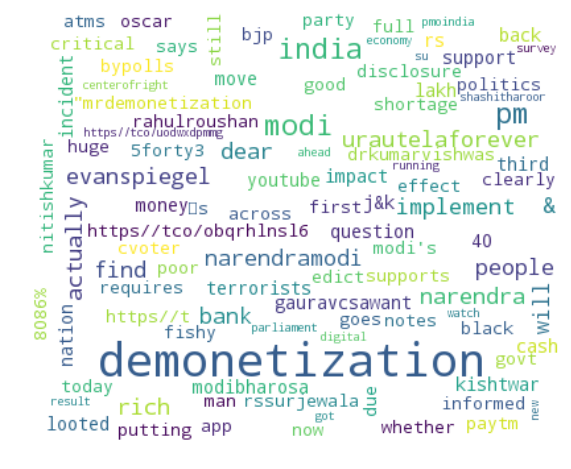

In [129]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wc=WordCloud(width=400,height=330,max_words=100,background_color='white').generate_from_frequencies(word_freq)
print(wc)

plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()